In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## Population Data

In [7]:
population_data = pd.read_csv('cc-est2023-alldata.csv', encoding='latin1')
population_data

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,58809,28698,30111,...,965,846,132,116,43,33,22,25,19,10
1,50,1,1,Alabama,Autauga County,1,1,3491,1818,1673,...,93,60,17,11,3,0,11,1,3,0
2,50,1,1,Alabama,Autauga County,1,2,3663,1875,1788,...,92,77,6,9,9,4,0,1,1,2
3,50,1,1,Alabama,Autauga County,1,3,4190,2153,2037,...,94,93,12,13,1,3,2,2,3,1
4,50,1,1,Alabama,Autauga County,1,4,3881,1962,1919,...,80,79,9,11,6,3,2,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298675,50,56,45,Wyoming,Weston County,5,14,574,299,275,...,6,7,0,1,0,0,0,0,0,0
298676,50,56,45,Wyoming,Weston County,5,15,437,252,185,...,6,6,0,0,0,0,0,0,0,0
298677,50,56,45,Wyoming,Weston County,5,16,271,135,136,...,3,1,0,0,0,0,0,0,0,0
298678,50,56,45,Wyoming,Weston County,5,17,130,68,62,...,1,1,0,0,1,0,0,0,0,0


In [8]:
population_data.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

In [9]:
population_data = population_data[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'H_MALE', 'H_FEMALE']]

population_data

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,...,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,H_MALE,H_FEMALE
0,1,1,Alabama,Autauga County,1,0,58809,28698,30111,21979,...,5681,6368,136,149,300,390,37,30,1132,981
1,1,1,Alabama,Autauga County,1,1,3491,1818,1673,1299,...,388,390,4,4,33,23,3,3,118,71
2,1,1,Alabama,Autauga County,1,2,3663,1875,1788,1347,...,410,387,15,11,20,29,0,4,104,92
3,1,1,Alabama,Autauga County,1,3,4190,2153,2037,1540,...,505,465,7,11,17,25,3,2,108,108
4,1,1,Alabama,Autauga County,1,4,3881,1962,1919,1415,...,463,424,6,2,21,24,4,7,91,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298675,56,45,Wyoming,Weston County,5,14,574,299,275,276,...,3,1,6,3,10,16,0,0,6,8
298676,56,45,Wyoming,Weston County,5,15,437,252,185,238,...,0,0,2,0,9,8,0,0,6,6
298677,56,45,Wyoming,Weston County,5,16,271,135,136,130,...,0,0,1,2,0,1,0,0,3,1
298678,56,45,Wyoming,Weston County,5,17,130,68,62,65,...,0,0,1,1,0,0,0,0,2,1


In [10]:
columns = population_data.drop(columns=['STNAME', 'CTYNAME', 'AGEGRP']).columns

population_data = population_data[population_data['YEAR'].isin([1,2,3,4])]

year_mapping = {
    1: 2019,
    2: 2020, 
    3: 2021,
    4: 2022,
}

population_data['YEAR'] = population_data['YEAR'].map(year_mapping)

age_mapping = {
    0: ('Total', 'Total'),        
    1: (0, 4),
    2: (5, 9),
    3: (10, 14),
    4: (15, 19),
    5: (20, 24),
    6: (25, 29),
    7: (30, 34),
    8: (35, 39),
    9: (40, 44),
    10: (45, 49),
    11: (50, 54),
    12: (55, 59),
    13: (60, 64),
    14: (65, 69),
    15: (70, 74),
    16: (75, 79),
    17: (80, 84),
    18: (85, None)         
}

population_data[['AGERANGE_LOWER', 'AGERANGE_UPPER']] = population_data['AGEGRP'].apply(lambda x: pd.Series(age_mapping[x]))

columns = columns.insert(2, 'AGERANGE_LOWER')
columns = columns.insert(3, 'AGERANGE_UPPER')
population_data = population_data [columns]
population_data

C:\Users\ashwi\AppData\Local\Temp\ipykernel_16348\728931721.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data['YEAR'] = population_data['YEAR'].map(year_mapping)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_16348\728931721.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data[['AGERANGE_LOWER', 'AGERANGE_UPPER']] = population_data['AGEGRP'].apply(lambda x: pd.Series(age_mapping[x]))
C:\Users\ashwi\AppData\Local\Temp\ipykernel_16348\728931721.py:36: SettingWithCopyWarning: 
A

,STATE,COUNTY,AGERANGE_LOWER,AGERANGE_UPPER,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,H_MALE,H_FEMALE
0,1,1,Total,Total,2019,58809,28698,30111,21979,22636,5681,6368,136,149,300,390,37,30,1132,981
1,1,1,0,4,2019,3491,1818,1673,1299,1171,388,390,4,4,33,23,3,3,118,71
2,1,1,5,9,2019,3663,1875,1788,1347,1271,410,387,15,11,20,29,0,4,104,92
3,1,1,10,14,2019,4190,2153,2037,1540,1459,505,465,7,11,17,25,3,2,108,108
4,1,1,15,19,2019,3881,1962,1919,1415,1409,463,424,6,2,21,24,4,7,91,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298656,56,45,65,69,2022,582,316,266,288,238,3,1,6,3,15,20,0,0,5,8
298657,56,45,70,74,2022,406,224,182,217,175,0,0,1,0,4,4,0,0,6,5
298658,56,45,75,79,2022,249,127,122,122,117,0,0,1,3,0,1,0,0,2,0
298659,56,45,80,84,2022,137,64,73,61,72,0,0,1,1,0,0,0,0,2,1


In [11]:
population_data.rename(columns={'WA_MALE': 'White_Alone_MALE', 'WA_FEMALE': 'White_Alone_FEMALE',
                     'BA_MALE': 'Black_Alone_MALE', 'BA_FEMALE': 'Black_Alone_FEMALE',
                     'IA_MALE': 'Native_India_Alone_MALE', 'IA_FEMALE': 'Native_India_Alone_FEMALE',
                     'AA_MALE': 'Asian_Alone_MALE', 'AA_FEMALE': 'Asian_Alone_FEMALE',
                     'NA_MALE': 'Native_Hawaiian_Alone_MALE', 'NA_FEMALE': 'Native_Hawaiian_Alone_FEMALE',
                     'H_MALE': 'Hispanic_Alone_MALE', 'H_FEMALE': 'Hispanic_Alone_FEMALE',
                     }, inplace=True)

male_columns = population_data.columns[population_data.columns.str.contains("_MALE")]
male_alone_columns = ['White_Alone_MALE', 'Black_Alone_MALE', 'Native_India_Alone_MALE', 'Asian_Alone_MALE', 'Native_Hawaiian_Alone_MALE', 'Hispanic_Alone_MALE']

female_columns = population_data.columns[population_data.columns.str.contains("FEMALE")]
female_alone_columns = ['White_Alone_FEMALE', 'Black_Alone_FEMALE', 'Native_India_Alone_FEMALE', 'Asian_Alone_FEMALE', 'Native_Hawaiian_Alone_FEMALE', 'Hispanic_Alone_FEMALE']

In [12]:
percentage_columns = []
for col in male_alone_columns + female_alone_columns:
    population_data[f"{col}_PERCENT"] = (population_data[col] / population_data['TOT_POP']) * 100
    percentage_columns.append(f"{col}_PERCENT")

In [13]:
percentage_columns

['White_Alone_MALE_PERCENT',
 'Black_Alone_MALE_PERCENT',
 'Native_India_Alone_MALE_PERCENT',
 'Asian_Alone_MALE_PERCENT',
 'Native_Hawaiian_Alone_MALE_PERCENT',
 'Hispanic_Alone_MALE_PERCENT',
 'White_Alone_FEMALE_PERCENT',
 'Black_Alone_FEMALE_PERCENT',
 'Native_India_Alone_FEMALE_PERCENT',
 'Asian_Alone_FEMALE_PERCENT',
 'Native_Hawaiian_Alone_FEMALE_PERCENT',
 'Hispanic_Alone_FEMALE_PERCENT']

In [14]:
population_data

,STATE,COUNTY,AGERANGE_LOWER,AGERANGE_UPPER,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,White_Alone_MALE,White_Alone_FEMALE,...,Native_India_Alone_MALE_PERCENT,Asian_Alone_MALE_PERCENT,Native_Hawaiian_Alone_MALE_PERCENT,Hispanic_Alone_MALE_PERCENT,White_Alone_FEMALE_PERCENT,Black_Alone_FEMALE_PERCENT,Native_India_Alone_FEMALE_PERCENT,Asian_Alone_FEMALE_PERCENT,Native_Hawaiian_Alone_FEMALE_PERCENT,Hispanic_Alone_FEMALE_PERCENT
0,1,1,Total,Total,2019,58809,28698,30111,21979,22636,...,0.231257,0.510126,0.062916,1.924875,38.490707,10.828275,0.253363,0.663164,0.051013,1.668112
1,1,1,0,4,2019,3491,1818,1673,1299,1171,...,0.114580,0.945288,0.085935,3.380120,33.543397,11.171584,0.114580,0.658837,0.085935,2.033801
2,1,1,5,9,2019,3663,1875,1788,1347,1271,...,0.409500,0.546001,0.000000,2.839203,34.698335,10.565111,0.300300,0.791701,0.109200,2.511603
3,1,1,10,14,2019,4190,2153,2037,1540,1459,...,0.167064,0.405728,0.071599,2.577566,34.821002,11.097852,0.262530,0.596659,0.047733,2.577566
4,1,1,15,19,2019,3881,1962,1919,1415,1409,...,0.154599,0.541098,0.103066,2.344757,36.305076,10.925019,0.051533,0.618397,0.180366,2.241690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298656,56,45,65,69,2022,582,316,266,288,238,...,1.030928,2.577320,0.000000,0.859107,40.893471,0.171821,0.515464,3.436426,0.000000,1.374570
298657,56,45,70,74,2022,406,224,182,217,175,...,0.246305,0.985222,0.000000,1.477833,43.103448,0.000000,0.000000,0.985222,0.000000,1.231527
298658,56,45,75,79,2022,249,127,122,122,117,...,0.401606,0.000000,0.000000,0.803213,46.987952,0.000000,1.204819,0.401606,0.000000,0.000000
298659,56,45,80,84,2022,137,64,73,61,72,...,0.729927,0.000000,0.000000,1.459854,52.554745,0.000000,0.729927,0.000000,0.000000,0.729927


## GROCERY DATA

In [ ]:
df = pd.read_csv('merged Data/merged_data_2019_EMPSIZE_001.csv')

for i in range(len(df)):
    value = df.loc[i, 'State_County_ID']
    df.at[i, 'STATE'] = int(str(value)[:-3])
    df.at[i, 'COUNTY'] = int(str(value)[-3:])

df.drop(columns=['State_County_ID'], inplace=True)
df

,Total_Population,MedianFamilyIncome_County,PovertyRate_County,Total_LowIncomeTracts,Total_LILATracts_1And10,Total_LILATracts_halfAnd10,Total_LILATracts_1And20,Total_LILATracts_Vehicle,GEO_ID,NAME,...,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,STATE,COUNTY
0,54571,75759.553774,15.139879,5,5,5,3,1,0500000US01001,"Autauga County, Alabama",...,2019.0,7.0,5830.0,J,1441.0,J,322.0,J,1.0,1.0
1,182265,73727.425885,10.947043,7,4,4,3,3,0500000US01003,"Baldwin County, Alabama",...,2019.0,32.0,37442.0,J,8752.0,J,1587.0,J,1.0,3.0
2,27457,45025.706996,29.341716,8,4,5,1,3,0500000US01005,"Barbour County, Alabama",...,2019.0,5.0,2606.0,J,642.0,J,135.0,J,1.0,5.0
3,22915,57929.822954,13.855111,1,0,0,0,1,0500000US01007,"Bibb County, Alabama",...,2019.0,5.0,1813.0,G,504.0,G,110.0,H,1.0,7.0
4,57322,60206.638812,14.615919,3,0,0,0,2,0500000US01009,"Blount County, Alabama",...,2019.0,6.0,2176.0,G,548.0,G,121.0,G,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,43806,84848.604255,12.506304,2,0,0,0,1,0500000US56037,"Sweetwater County, Wyoming",...,2019.0,6.0,9907.0,J,2883.0,J,307.0,J,56.0,37.0
3138,21294,111309.250869,7.046880,0,0,0,0,0,0500000US56039,"Teton County, Wyoming",...,2019.0,10.0,20440.0,G,5307.0,G,565.0,G,56.0,39.0
3139,21118,69662.406052,12.590441,1,0,0,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,41.0
3140,8533,66985.561233,12.274498,0,0,0,0,0,0500000US56043,"Washakie County, Wyoming",...,2019.0,4.0,3520.0,J,1643.0,J,104.0,H,56.0,43.0


In [16]:
df.columns

Index(['Total_Population', 'MedianFamilyIncome_County', 'PovertyRate_County',
       'Total_LowIncomeTracts', 'Total_LILATracts_1And10',
       'Total_LILATracts_halfAnd10', 'Total_LILATracts_1And20',
       'Total_LILATracts_Vehicle', 'GEO_ID', 'NAME', 'NAICS2017',
       'NAICS2017_LABEL', 'LFO', 'LFO_LABEL', 'EMPSIZES', 'EMPSIZES_LABEL',
       'YEAR', 'ESTAB', 'PAYANN', 'PAYANN_N', 'PAYQTR1', 'PAYQTR1_N', 'EMP',
       'EMP_N', 'STATE', 'COUNTY'],
      dtype='object')

In [17]:
df[['EMPSIZES', 'ESTAB', 'EMP']]

,EMPSIZES,ESTAB,EMP
0,1.0,7.0,322.0
1,1.0,32.0,1587.0
2,1.0,5.0,135.0
3,1.0,5.0,110.0
4,1.0,6.0,121.0
...,...,...,...
3137,1.0,6.0,307.0
3138,1.0,10.0,565.0
3139,NaN,NaN,NaN
3140,1.0,4.0,104.0


In [18]:
df[['PAYANN_N', 'PAYQTR1', 'PAYQTR1_N','EMP_N']]

,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP_N
0,J,1441.0,J,J
1,J,8752.0,J,J
2,J,642.0,J,J
3,G,504.0,G,H
4,G,548.0,G,G
...,...,...,...,...
3137,J,2883.0,J,J
3138,G,5307.0,G,G
3139,NaN,NaN,NaN,NaN
3140,J,1643.0,J,H


Each dataset check for specific number of stores in a specific county in an EMPSIZES range 

(All establishments, less than 5 employees, 5 to 9, 10 to 19, 20 to 49, 50 to 99, 100 to 249, 250 to 500, 500 to 999)

ESTAB: Number of establishments or businesses in the given sector and region.

PAYANN_N / PAYQTR1_N: J, G, H, N???

J: Indicates that the payroll data for the establishments fall within a specific range, often defined as between 250 to 499 employees in the dataset's underlying classification.

G: Typically represents establishments with payroll data corresponding to 1,000 to 2,499 employees.

H: Represents payroll data for establishments in the 500 to 999 employee range.

PAYQTR1 in second dataset onwards??

J: High noise 
H: Medium noise
G: Low noise

## Merging grocery data for a year

In [ ]:
import glob

def combining_data_function(year):
    csv_files = glob.glob(f"merged Data/merged_data_{year}_EMPSIZE_*.csv")
    
    common_columns = ['STATE', 'COUNTY', 'YEAR', 'Total_Population', 'MedianFamilyIncome_County',
                      'PovertyRate_County', 'Total_LowIncomeTracts',
                      'Total_LILATracts_1And10', 'Total_LILATracts_halfAnd10',
                      'Total_LILATracts_1And20', 'Total_LILATracts_Vehicle']

    dataframes = []
    column_order = []
    EMP_column = None 
    PAYANN_column = None 

    for i, file in enumerate(csv_files):
        
        df = pd.read_csv(file)

        df['STATE'] = df['State_County_ID'].astype(str).str[:-3].astype(int)
        df['COUNTY'] = df['State_County_ID'].astype(str).str[-3:].astype(int)
        df.drop(columns=['State_County_ID'], inplace=True)

        df['YEAR'] = df['YEAR'].fillna(year)

        most_common_label = df['EMPSIZES_LABEL'].mode()[0]
        df['EMPSIZES_LABEL'] = df['EMPSIZES_LABEL'].fillna(most_common_label)

        if i == 0:
            EMP_column = df[['EMP']] 
            PAYANN_column = df[['PAYANN']]             

        common_data = df[common_columns]

        emp_size_label = most_common_label.replace(' ', '_')
        rename_dict = {
            'ESTAB': f'ESTAB_{emp_size_label}'
        }
        df.rename(columns=rename_dict, inplace=True)

        dataframes.append(df.drop(columns=common_columns))
        column_order.extend(rename_dict.values())

    combined_df = pd.concat([common_data] + dataframes, axis=1)

    if EMP_column is not None:
        combined_df['EMP'] = EMP_column['EMP']
    if PAYANN_column is not None:    
        combined_df['PAYANN'] = PAYANN_column['PAYANN']

    fixed_columns = ['STATE', 'COUNTY', 'YEAR', 'EMP', 'PAYANN']
    column_order = sorted(set(column_order))  
    desired_order = fixed_columns + column_order

    combined_df = combined_df[desired_order]
    combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()].fillna(0)

    return combined_df

In [20]:
merged_data_2019 = combining_data_function(2019)
merged_data_2019

,STATE,COUNTY,YEAR,EMP,PAYANN,ESTAB_All_establishments,ESTAB_Establishments_with_100_to_249_employees,ESTAB_Establishments_with_10_to_19_employees,ESTAB_Establishments_with_20_to_49_employees,ESTAB_Establishments_with_250_to_499_employees,ESTAB_Establishments_with_500_to_999_employees,ESTAB_Establishments_with_50_to_99_employees,ESTAB_Establishments_with_5_to_9_employees,ESTAB_Establishments_with_less_than_5_employees
0,1,1,2019.0,322.0,5830.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1,3,2019.0,1587.0,37442.0,32.0,7.0,3.0,8.0,0.0,0.0,5.0,0.0,8.0
2,1,5,2019.0,135.0,2606.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,7,2019.0,110.0,1813.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,9,2019.0,121.0,2176.0,6.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56,37,2019.0,307.0,9907.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,56,39,2019.0,565.0,20440.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3139,56,41,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3140,56,43,2019.0,104.0,3520.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
merged_data_2020 = combining_data_function(2020)
merged_data_2020

,STATE,COUNTY,YEAR,EMP,PAYANN,ESTAB_All_establishments,"ESTAB_Establishments_with_1,000_employees_or_more","ESTAB_Establishments_with_1,000_to_1,499_employees",ESTAB_Establishments_with_100_to_249_employees,ESTAB_Establishments_with_10_to_19_employees,ESTAB_Establishments_with_20_to_49_employees,ESTAB_Establishments_with_250_to_499_employees,ESTAB_Establishments_with_500_to_999_employees,ESTAB_Establishments_with_50_to_99_employees,ESTAB_Establishments_with_5_to_9_employees,ESTAB_Establishments_with_less_than_5_employees
0,1,1,2020.0,314.0,6398.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,2020.0,1672.0,44014.0,35.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,10.0,0.0,9.0
2,1,5,2020.0,133.0,2783.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,7,2020.0,97.0,1885.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,9,2020.0,90.0,1982.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56,37,2020.0,308.0,10629.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,56,39,2020.0,531.0,21439.0,12.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3139,56,41,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3140,56,43,2020.0,114.0,3793.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
merged_data_2021 = combining_data_function(2021)
merged_data_2021

,STATE,COUNTY,YEAR,EMP,PAYANN,ESTAB_All_establishments,"ESTAB_Establishments_with_1,000_employees_or_more","ESTAB_Establishments_with_1,000_to_1,499_employees",ESTAB_Establishments_with_100_to_249_employees,ESTAB_Establishments_with_10_to_19_employees,ESTAB_Establishments_with_20_to_49_employees,ESTAB_Establishments_with_250_to_499_employees,ESTAB_Establishments_with_500_to_999_employees,ESTAB_Establishments_with_50_to_99_employees,ESTAB_Establishments_with_5_to_9_employees,ESTAB_Establishments_with_less_than_5_employees
0,1,1,2021.0,339.0,7161.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,1,3,2021.0,1764.0,47346.0,43.0,0.0,0.0,6.0,4.0,5.0,0.0,0.0,11.0,0.0,15.0
2,1,5,2021.0,145.0,3095.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,7,2021.0,93.0,2026.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,9,2021.0,100.0,2218.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56,37,2021.0,325.0,10664.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,56,39,2021.0,510.0,17352.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3139,56,41,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3140,56,43,2021.0,81.0,3819.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
merged_data_2022 = combining_data_function(2022)
merged_data_2022

,STATE,COUNTY,YEAR,EMP,PAYANN,ESTAB_All_establishments,"ESTAB_Establishments_with_1,000_employees_or_more","ESTAB_Establishments_with_1,000_to_1,499_employees",ESTAB_Establishments_with_100_to_249_employees,ESTAB_Establishments_with_10_to_19_employees,ESTAB_Establishments_with_20_to_49_employees,ESTAB_Establishments_with_250_to_499_employees,ESTAB_Establishments_with_500_to_999_employees,ESTAB_Establishments_with_50_to_99_employees,ESTAB_Establishments_with_5_to_9_employees,ESTAB_Establishments_with_less_than_5_employees
0,1,1,2022.0,297.0,7603.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,1,3,2022.0,1863.0,51840.0,37.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0,11.0,0.0,11.0
2,1,5,2022.0,143.0,3354.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,7,2022.0,106.0,2413.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,9,2022.0,148.0,3611.0,11.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56,37,2022.0,319.0,11270.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,56,39,2022.0,373.0,17104.0,10.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
3139,56,41,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3140,56,43,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
merged_data_2019.columns

Index(['STATE', 'COUNTY', 'YEAR', 'EMP', 'PAYANN', 'ESTAB_All_establishments',
       'ESTAB_Establishments_with_100_to_249_employees',
       'ESTAB_Establishments_with_10_to_19_employees',
       'ESTAB_Establishments_with_20_to_49_employees',
       'ESTAB_Establishments_with_250_to_499_employees',
       'ESTAB_Establishments_with_500_to_999_employees',
       'ESTAB_Establishments_with_50_to_99_employees',
       'ESTAB_Establishments_with_5_to_9_employees',
       'ESTAB_Establishments_with_less_than_5_employees'],
      dtype='object')

## FINAL COMBINED DATA

In [ ]:
from simpledbf import Dbf5

county_area_data = Dbf5('tl_2021_us_county.dbf')
county_area_data = county_area_data.to_dataframe()
county_area_data.rename(columns={'STATEFP': 'STATE', 'COUNTYFP': 'COUNTY'}, inplace=True)
county_area_data['STATE'] = county_area_data['STATE'].astype(int)
county_area_data['COUNTY'] = county_area_data['COUNTY'].astype(int)
county_area_data = county_area_data [['STATE', 'COUNTY', 'ALAND']].sort_values(['STATE', 'COUNTY'])
county_area_data

PyTables is not installed. No support for HDF output.


,STATE,COUNTY,ALAND
1327,1,1,1539634184
1246,1,3,4117656514
1826,1,5,2292160149
3015,1,7,1612188717
855,1,9,1670259090
...,...,...,...
260,72,151,143005188
968,72,153,175371930
1248,78,10,215914980
1459,78,20,50998053


In [26]:
grocery_merged_data = pd.concat([merged_data_2019, merged_data_2020, merged_data_2021, merged_data_2022], ignore_index=True)
grocery_merged_data.fillna(0, inplace=True)
grocery_merged_data

,STATE,COUNTY,YEAR,EMP,PAYANN,ESTAB_All_establishments,ESTAB_Establishments_with_100_to_249_employees,ESTAB_Establishments_with_10_to_19_employees,ESTAB_Establishments_with_20_to_49_employees,ESTAB_Establishments_with_250_to_499_employees,ESTAB_Establishments_with_500_to_999_employees,ESTAB_Establishments_with_50_to_99_employees,ESTAB_Establishments_with_5_to_9_employees,ESTAB_Establishments_with_less_than_5_employees,"ESTAB_Establishments_with_1,000_employees_or_more","ESTAB_Establishments_with_1,000_to_1,499_employees"
0,1,1,2019.0,322.0,5830.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,3,2019.0,1587.0,37442.0,32.0,7.0,3.0,8.0,0.0,0.0,5.0,0.0,8.0,0.0,0.0
2,1,5,2019.0,135.0,2606.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,7,2019.0,110.0,1813.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,9,2019.0,121.0,2176.0,6.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563,56,37,2022.0,319.0,11270.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12564,56,39,2022.0,373.0,17104.0,10.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
12565,56,41,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12566,56,43,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
grocery_merged_data = pd.merge(grocery_merged_data, county_area_data, on=['STATE', 'COUNTY'], how='inner')
grocery_merged_data ['ALAND'] = grocery_merged_data.ALAND / 1000000
grocery_merged_data 

,STATE,COUNTY,YEAR,EMP,PAYANN,ESTAB_All_establishments,ESTAB_Establishments_with_100_to_249_employees,ESTAB_Establishments_with_10_to_19_employees,ESTAB_Establishments_with_20_to_49_employees,ESTAB_Establishments_with_250_to_499_employees,ESTAB_Establishments_with_500_to_999_employees,ESTAB_Establishments_with_50_to_99_employees,ESTAB_Establishments_with_5_to_9_employees,ESTAB_Establishments_with_less_than_5_employees,"ESTAB_Establishments_with_1,000_employees_or_more","ESTAB_Establishments_with_1,000_to_1,499_employees",ALAND
0,1,1,2019.0,322.0,5830.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1539.634184
1,1,3,2019.0,1587.0,37442.0,32.0,7.0,3.0,8.0,0.0,0.0,5.0,0.0,8.0,0.0,0.0,4117.656514
2,1,5,2019.0,135.0,2606.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2292.160149
3,1,7,2019.0,110.0,1813.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1612.188717
4,1,9,2019.0,121.0,2176.0,6.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1670.259090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,56,37,2022.0,319.0,11270.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27005.754359
12560,56,39,2022.0,373.0,17104.0,10.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,10351.790059
12561,56,41,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5391.631765
12562,56,43,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5798.152471


In [28]:
population_data

,STATE,COUNTY,AGERANGE_LOWER,AGERANGE_UPPER,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,White_Alone_MALE,White_Alone_FEMALE,...,Native_India_Alone_MALE_PERCENT,Asian_Alone_MALE_PERCENT,Native_Hawaiian_Alone_MALE_PERCENT,Hispanic_Alone_MALE_PERCENT,White_Alone_FEMALE_PERCENT,Black_Alone_FEMALE_PERCENT,Native_India_Alone_FEMALE_PERCENT,Asian_Alone_FEMALE_PERCENT,Native_Hawaiian_Alone_FEMALE_PERCENT,Hispanic_Alone_FEMALE_PERCENT
0,1,1,Total,Total,2019,58809,28698,30111,21979,22636,...,0.231257,0.510126,0.062916,1.924875,38.490707,10.828275,0.253363,0.663164,0.051013,1.668112
1,1,1,0,4,2019,3491,1818,1673,1299,1171,...,0.114580,0.945288,0.085935,3.380120,33.543397,11.171584,0.114580,0.658837,0.085935,2.033801
2,1,1,5,9,2019,3663,1875,1788,1347,1271,...,0.409500,0.546001,0.000000,2.839203,34.698335,10.565111,0.300300,0.791701,0.109200,2.511603
3,1,1,10,14,2019,4190,2153,2037,1540,1459,...,0.167064,0.405728,0.071599,2.577566,34.821002,11.097852,0.262530,0.596659,0.047733,2.577566
4,1,1,15,19,2019,3881,1962,1919,1415,1409,...,0.154599,0.541098,0.103066,2.344757,36.305076,10.925019,0.051533,0.618397,0.180366,2.241690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298656,56,45,65,69,2022,582,316,266,288,238,...,1.030928,2.577320,0.000000,0.859107,40.893471,0.171821,0.515464,3.436426,0.000000,1.374570
298657,56,45,70,74,2022,406,224,182,217,175,...,0.246305,0.985222,0.000000,1.477833,43.103448,0.000000,0.000000,0.985222,0.000000,1.231527
298658,56,45,75,79,2022,249,127,122,122,117,...,0.401606,0.000000,0.000000,0.803213,46.987952,0.000000,1.204819,0.401606,0.000000,0.000000
298659,56,45,80,84,2022,137,64,73,61,72,...,0.729927,0.000000,0.000000,1.459854,52.554745,0.000000,0.729927,0.000000,0.000000,0.729927


In [29]:
final_merged_data = pd.merge(population_data, grocery_merged_data, how='inner', left_on=['STATE', 'COUNTY', 'YEAR'], right_on=['STATE', 'COUNTY', 'YEAR'])
final_merged_data.dropna(subset=percentage_columns, inplace=True)
final_merged_data

,STATE,COUNTY,AGERANGE_LOWER,AGERANGE_UPPER,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,White_Alone_MALE,White_Alone_FEMALE,...,ESTAB_Establishments_with_10_to_19_employees,ESTAB_Establishments_with_20_to_49_employees,ESTAB_Establishments_with_250_to_499_employees,ESTAB_Establishments_with_500_to_999_employees,ESTAB_Establishments_with_50_to_99_employees,ESTAB_Establishments_with_5_to_9_employees,ESTAB_Establishments_with_less_than_5_employees,"ESTAB_Establishments_with_1,000_employees_or_more","ESTAB_Establishments_with_1,000_to_1,499_employees",ALAND
0,1,1,Total,Total,2019,58809,28698,30111,21979,22636,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1539.634184
1,1,1,0,4,2019,3491,1818,1673,1299,1171,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1539.634184
2,1,1,5,9,2019,3663,1875,1788,1347,1271,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1539.634184
3,1,1,10,14,2019,4190,2153,2037,1540,1459,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1539.634184
4,1,1,15,19,2019,3881,1962,1919,1415,1409,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1539.634184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238103,56,45,65,69,2022,582,316,266,288,238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6210.804121
238104,56,45,70,74,2022,406,224,182,217,175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6210.804121
238105,56,45,75,79,2022,249,127,122,122,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6210.804121
238106,56,45,80,84,2022,137,64,73,61,72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6210.804121


In [30]:
area_columns = []
for col in final_merged_data.columns[final_merged_data.columns.tolist().index('EMP'):-1]:
    final_merged_data[f"{col}/Area"] = (final_merged_data[col] / final_merged_data['ALAND']) 
    area_columns.append(f"{col}/Area")
    
final_merged_data

,STATE,COUNTY,AGERANGE_LOWER,AGERANGE_UPPER,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,White_Alone_MALE,White_Alone_FEMALE,...,ESTAB_Establishments_with_100_to_249_employees/Area,ESTAB_Establishments_with_10_to_19_employees/Area,ESTAB_Establishments_with_20_to_49_employees/Area,ESTAB_Establishments_with_250_to_499_employees/Area,ESTAB_Establishments_with_500_to_999_employees/Area,ESTAB_Establishments_with_50_to_99_employees/Area,ESTAB_Establishments_with_5_to_9_employees/Area,ESTAB_Establishments_with_less_than_5_employees/Area,"ESTAB_Establishments_with_1,000_employees_or_more/Area","ESTAB_Establishments_with_1,000_to_1,499_employees/Area"
0,1,1,Total,Total,2019,58809,28698,30111,21979,22636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
1,1,1,0,4,2019,3491,1818,1673,1299,1171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
2,1,1,5,9,2019,3663,1875,1788,1347,1271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
3,1,1,10,14,2019,4190,2153,2037,1540,1459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
4,1,1,15,19,2019,3881,1962,1919,1415,1409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238103,56,45,65,69,2022,582,316,266,288,238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238104,56,45,70,74,2022,406,224,182,217,175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238105,56,45,75,79,2022,249,127,122,122,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238106,56,45,80,84,2022,137,64,73,61,72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [31]:
final_merged_data.columns.tolist()

['STATE',
 'COUNTY',
 'AGERANGE_LOWER',
 'AGERANGE_UPPER',
 'YEAR',
 'TOT_POP',
 'TOT_MALE',
 'TOT_FEMALE',
 'White_Alone_MALE',
 'White_Alone_FEMALE',
 'Black_Alone_MALE',
 'Black_Alone_FEMALE',
 'Native_India_Alone_MALE',
 'Native_India_Alone_FEMALE',
 'Asian_Alone_MALE',
 'Asian_Alone_FEMALE',
 'Native_Hawaiian_Alone_MALE',
 'Native_Hawaiian_Alone_FEMALE',
 'Hispanic_Alone_MALE',
 'Hispanic_Alone_FEMALE',
 'White_Alone_MALE_PERCENT',
 'Black_Alone_MALE_PERCENT',
 'Native_India_Alone_MALE_PERCENT',
 'Asian_Alone_MALE_PERCENT',
 'Native_Hawaiian_Alone_MALE_PERCENT',
 'Hispanic_Alone_MALE_PERCENT',
 'White_Alone_FEMALE_PERCENT',
 'Black_Alone_FEMALE_PERCENT',
 'Native_India_Alone_FEMALE_PERCENT',
 'Asian_Alone_FEMALE_PERCENT',
 'Native_Hawaiian_Alone_FEMALE_PERCENT',
 'Hispanic_Alone_FEMALE_PERCENT',
 'EMP',
 'PAYANN',
 'ESTAB_All_establishments',
 'ESTAB_Establishments_with_100_to_249_employees',
 'ESTAB_Establishments_with_10_to_19_employees',
 'ESTAB_Establishments_with_20_to_49_emp

## COUNTY SIMILAIRTY

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

filtered_data = final_merged_data[
    (final_merged_data['AGERANGE_LOWER'] == 'Total') & 
    (final_merged_data['AGERANGE_UPPER'] == 'Total')
]

columns_of_interest = ['TOT_POP', 'TOT_MALE', 'TOT_FEMALE'] + percentage_columns + area_columns
grouped_data = filtered_data.groupby(['STATE', 'COUNTY', 'YEAR'])[columns_of_interest].mean()

flattened_data = grouped_data.unstack(level=2)  
flattened_data.columns = ['{}_{}'.format(col, year) for col, year in flattened_data.columns]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(flattened_data)

similarity = cosine_similarity(scaled_features)

state_county_geoids = flattened_data.index.map(lambda x: f"{int(x[0]):02d}{int(x[1]):03d}")
similarity_df = pd.DataFrame(similarity, index=state_county_geoids, columns=state_county_geoids)

In [33]:
similarity_df

,01001,01003,01005,01007,01009,01011,01013,01015,01017,01019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
01001,1.000000,0.061783,0.887981,0.892588,-0.470682,0.856868,0.934216,0.967799,0.938010,-0.040490,...,-0.193768,-0.394107,-0.465400,-0.372145,-0.435130,-0.688899,-0.685165,-0.520586,-0.629011,-0.379180
01003,0.061783,1.000000,-0.208540,0.016540,0.336363,-0.240150,-0.149104,0.143211,-0.134332,0.442039,...,0.385938,0.348676,0.198969,0.350325,0.156170,-0.063000,-0.073938,0.174285,-0.024037,0.092602
01005,0.887981,-0.208540,1.000000,0.833018,-0.711431,0.995815,0.972256,0.911839,0.979649,-0.427014,...,-0.554718,-0.714883,-0.722339,-0.699063,-0.670504,-0.719026,-0.772089,-0.733661,-0.739627,-0.605625
01007,0.892588,0.016540,0.833018,1.000000,-0.292838,0.793720,0.796674,0.859800,0.820301,0.103525,...,-0.110552,-0.246691,-0.284436,-0.223157,-0.229838,-0.507925,-0.539468,-0.325172,-0.437725,-0.207542
01009,-0.470682,0.336363,-0.711431,-0.292838,1.000000,-0.753541,-0.716451,-0.536461,-0.687748,0.794824,...,0.819797,0.940965,0.961619,0.911483,0.889422,0.833815,0.811526,0.969489,0.899520,0.691714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,-0.688899,-0.063000,-0.719026,-0.507925,0.833815,-0.731989,-0.780542,-0.746893,-0.756511,0.410980,...,0.464431,0.704846,0.818493,0.661368,0.781978,1.000000,0.959014,0.873284,0.969186,0.617035
56039,-0.685165,-0.073938,-0.772089,-0.539468,0.811526,-0.783854,-0.801081,-0.783858,-0.791563,0.473257,...,0.493585,0.757371,0.847718,0.724395,0.835501,0.959014,1.000000,0.874235,0.954081,0.732564
56041,-0.520586,0.174285,-0.733661,-0.325172,0.969489,-0.768306,-0.746170,-0.614501,-0.725153,0.787794,...,0.782238,0.947514,0.984632,0.931127,0.951760,0.873284,0.874235,1.000000,0.948470,0.800129
56043,-0.629011,-0.024037,-0.739627,-0.437725,0.899520,-0.766834,-0.773279,-0.717890,-0.752163,0.588111,...,0.627211,0.830323,0.917005,0.796704,0.881507,0.969186,0.954081,0.948470,1.000000,0.737467


In [34]:
similarity_long = similarity_df.unstack().reset_index()
similarity_long.columns = ['GEOID_1', 'GEOID_2', 'Similarity']
similarity_long = similarity_long[similarity_long['GEOID_1'] != similarity_long['GEOID_2']].sort_values(by='Similarity', ascending=False).head(100)
similarity_long

,GEOID_1,GEOID_2,Similarity
4442625,28053,01063,0.999890
98541,01063,28053,0.999890
133004,01085,28053,0.999856
4442636,28053,01085,0.999856
6331032,38079,46041,0.999852
...,...,...,...
4597508,28151,28011,0.999639
4546014,28119,01063,0.999637
98574,01063,28119,0.999637
7395900,46017,38079,0.999629


## Clustering

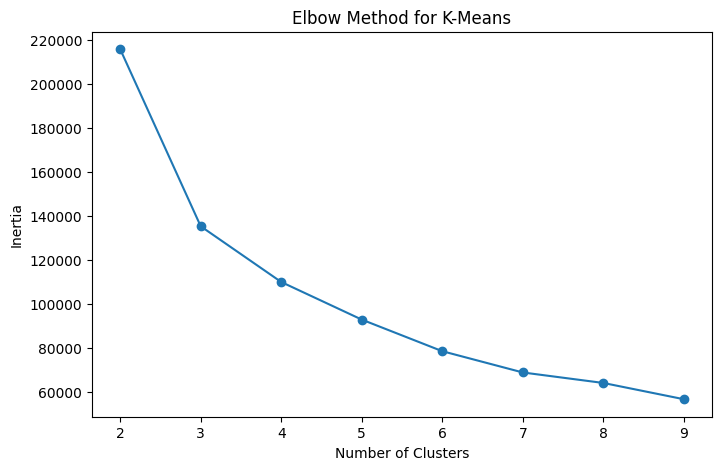

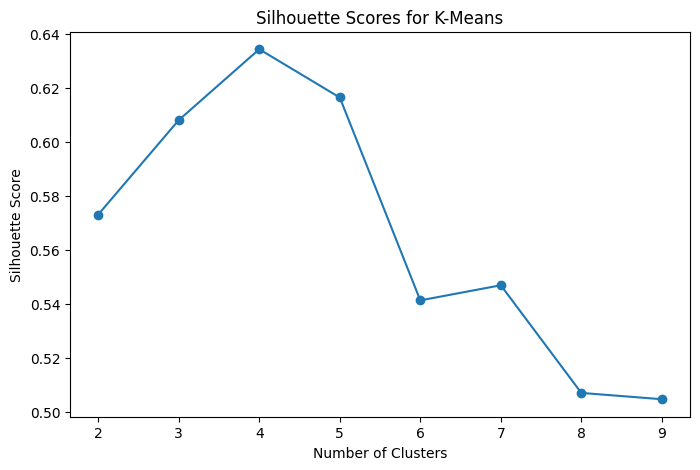

In [35]:
from sklearn.cluster import KMeans

inertia = []
silhouette_scores = []
similarity = (similarity - similarity.min()) / (similarity.max() - similarity.min())
distance_matrix = 1 - similarity

from sklearn.metrics import silhouette_score

for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(distance_matrix)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(distance_matrix, labels, metric='precomputed'))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
np.fill_diagonal(distance_matrix, 0)

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

state_county_geoids = similarity_df.index
clustered_df = pd.DataFrame({
    'GEOID': state_county_geoids,
    'KMeans_Cluster': kmeans_labels,
})
clustered_df

,GEOID,KMeans_Cluster
0,01001,1
1,01003,0
2,01005,1
3,01007,1
4,01009,0
...,...,...
3128,56037,0
3129,56039,0
3130,56041,0
3131,56043,0


In [37]:
clustered_df.KMeans_Cluster.value_counts()

KMeans_Cluster
0    1658
1     596
3     474
2     405
Name: count, dtype: int64

## Networks + Page Rank

In [38]:
import geopandas as gpd

shp_file_path = 'tl_2018_us_county.shp'
gdf = gpd.read_file(shp_file_path)

gdf['STATE'] = gdf['STATEFP'].astype(int)
gdf['COUNTY'] = gdf['COUNTYFP'].astype(int)
gdf = gdf[['STATE', 'COUNTY', 'geometry']]

gdf

,STATE,COUNTY,geometry
0,31,39,"POLYGON ((-97.01952 42.0041, -97.01952 42.0049..."
1,53,69,"POLYGON ((-123.43639 46.2382, -123.44759 46.24..."
2,35,11,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,"POLYGON ((-98.27367 40.0894, -98.27367 40.0894..."
...,...,...,...
3228,13,123,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3229,27,135,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3230,28,89,"POLYGON ((-90.09362 32.70763, -90.0936 32.7076..."
3231,48,227,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."


In [39]:
adjacency_list = []

for idx, county in gdf.iterrows():
    
    touching_counties = gdf[gdf.geometry.touches(county.geometry)]

    for _, neighbor in touching_counties.iterrows():
        
        adjacency_list.append({
            'County_STATE': county['STATE'],
            'COUNTY': county['COUNTY'],
            'Neighbor_STATE': neighbor['STATE'],
            'Neighbor_COUNTY': neighbor['COUNTY']
        })

adjacency_df = pd.DataFrame(adjacency_list)

adjacency_df = adjacency_df.drop_duplicates()
adjacency_df = adjacency_df.sort_values(['County_STATE', 'COUNTY', 'Neighbor_STATE', 'Neighbor_COUNTY'])

In [40]:
adjacency_df

,County_STATE,COUNTY,Neighbor_STATE,Neighbor_COUNTY
7766,1,1,1,21
7763,1,1,1,47
7764,1,1,1,51
7762,1,1,1,85
7765,1,1,1,101
...,...,...,...,...
5651,72,153,72,81
5653,72,153,72,93
5649,72,153,72,121
8546,78,20,78,30


In [41]:
G = nx.Graph()

for _, row in adjacency_df.iterrows():
    county = (row['County_STATE'], row['COUNTY'])
    adjacent_county = (row['Neighbor_STATE'], row['Neighbor_STATE'])
    G.add_edge(county, adjacent_county)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 3256
Number of edges: 4625


In [42]:
degrees = dict(G.degree)
pd.DataFrame(list(degrees.items()), columns=["STATE, COUNTY", "Degrees"])

,"STATE, COUNTY",Degrees
0,"(1, 1)",110
1,"(1, 3)",2
2,"(12, 12)",83
3,"(1, 5)",2
4,"(13, 13)",198
...,...,...
3251,"(72, 151)",1
3252,"(72, 153)",1
3253,"(78, 20)",1
3254,"(78, 78)",2


In [43]:
## Choose year and column

year = 2021
column = 'PAYANN/Area' #'ESTAB_All_establishments/Area', 'PAYANN/Area', 'EMP/Area'

employment_data  = final_merged_data[final_merged_data.YEAR == year].groupby(['STATE', 'COUNTY', 'YEAR'])[column].mean().reset_index()
employment_data 

,STATE,COUNTY,YEAR,PAYANN/Area
0,1,1,2021,4.651105
1,1,3,2021,11.498288
2,1,5,2021,1.350255
3,1,7,2021,1.256677
4,1,9,2021,1.327938
...,...,...,...,...
3128,56,37,2021,0.394879
3129,56,39,2021,1.676232
3130,56,41,2021,0.000000
3131,56,43,2021,0.658658


In [44]:
merged_data = adjacency_df.merge(
    employment_data,
    left_on=['County_STATE', 'COUNTY'],
    right_on=['STATE', 'COUNTY'],
    how='left'
)

merged_data.rename(columns={
    column: f'{column}_County',
}, inplace=True)


merged_data.drop(columns=['STATE'], inplace=True)

final_county_adjacency = merged_data.merge(
    employment_data,
    left_on=['Neighbor_STATE', 'Neighbor_COUNTY'],
    right_on=['STATE', 'COUNTY'],
    how='left',
    suffixes=('', '_Neighbor')
)

final_county_adjacency.rename(columns={
    column: f'{column}_Neighbor',
    'YEAR_Neighbor': 'YEAR_Neighbor'
}, inplace=True)

final_county_adjacency.drop(columns=['STATE'], inplace=True)

final_columns = [
    'County_STATE', 'COUNTY', 'Neighbor_STATE', 'Neighbor_COUNTY', 'YEAR',
    f'{column}_County', f'{column}_Neighbor'
]

final_county_adjacency_clean = final_county_adjacency[final_columns].dropna(
    subset=['YEAR', f'{column}_County', f'{column}_Neighbor']
)

final_county_adjacency = final_county_adjacency [['YEAR', 'County_STATE', 'COUNTY', f'{column}_County', 'Neighbor_STATE', 'Neighbor_COUNTY', f'{column}_Neighbor']].dropna()
final_county_adjacency

,YEAR,County_STATE,COUNTY,PAYANN/Area_County,Neighbor_STATE,Neighbor_COUNTY,PAYANN/Area_Neighbor
0,2021.0,1,1,4.651105,1,21,2.436974
1,2021.0,1,1,4.651105,1,47,1.652518
2,2021.0,1,1,4.651105,1,51,3.524464
3,2021.0,1,1,4.651105,1,85,0.000000
4,2021.0,1,1,4.651105,1,101,19.865202
...,...,...,...,...,...,...,...
18565,2021.0,56,45,0.353738,46,103,2.451685
18566,2021.0,56,45,0.353738,56,5,0.688574
18567,2021.0,56,45,0.353738,56,9,0.254801
18568,2021.0,56,45,0.353738,56,11,0.142836


In [45]:
G = nx.DiGraph()

for _, row in final_county_adjacency.iterrows():
    source = (row['County_STATE'], row['COUNTY'])
    target = (row['Neighbor_STATE'], row['Neighbor_COUNTY'])
    weight = row[f'{column}_Neighbor']
    G.add_edge(source, target, weight=weight)

    if not G.has_edge(source, source):
        self_weight = row[f'{column}_County']
        G.add_edge(source, source, weight=self_weight)

pagerank_scores = nx.pagerank(G, weight='weight')

max_node = max(pagerank_scores, key=pagerank_scores.get)
max_score = pagerank_scores[max_node]

pagerank_df = pd.DataFrame.from_dict(pagerank_scores, orient='index', columns=['PageRank']).reset_index()
pagerank_df.columns = ['County', 'PageRank']
pagerank_df[['County_STATE', 'COUNTY']] = pd.DataFrame(pagerank_df['County'].tolist(), index=pagerank_df.index)
pagerank_df.drop(columns=['County'], inplace=True)

top_10_pagerank_df = pagerank_df.sort_values(by='PageRank', ascending=False).head(10)
bottom_10_pagerank_df = pagerank_df.sort_values(by='PageRank', ascending=False).tail(10)

top_10_pagerank_df

,PageRank,County_STATE,COUNTY
280,0.005143,6.0,75.0
1042,0.004005,19.0,153.0
1115,0.003941,31.0,55.0
2665,0.003882,47.0,37.0
817,0.003769,17.0,31.0
936,0.003741,21.0,111.0
1163,0.003620,20.0,173.0
2470,0.003556,40.0,143.0
1645,0.003556,27.0,123.0
880,0.003538,29.0,510.0


## Older Correlations

In [46]:
final_merged_data.columns

Index(['STATE', 'COUNTY', 'AGERANGE_LOWER', 'AGERANGE_UPPER', 'YEAR',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'White_Alone_MALE',
       'White_Alone_FEMALE', 'Black_Alone_MALE', 'Black_Alone_FEMALE',
       'Native_India_Alone_MALE', 'Native_India_Alone_FEMALE',
       'Asian_Alone_MALE', 'Asian_Alone_FEMALE', 'Native_Hawaiian_Alone_MALE',
       'Native_Hawaiian_Alone_FEMALE', 'Hispanic_Alone_MALE',
       'Hispanic_Alone_FEMALE', 'White_Alone_MALE_PERCENT',
       'Black_Alone_MALE_PERCENT', 'Native_India_Alone_MALE_PERCENT',
       'Asian_Alone_MALE_PERCENT', 'Native_Hawaiian_Alone_MALE_PERCENT',
       'Hispanic_Alone_MALE_PERCENT', 'White_Alone_FEMALE_PERCENT',
       'Black_Alone_FEMALE_PERCENT', 'Native_India_Alone_FEMALE_PERCENT',
       'Asian_Alone_FEMALE_PERCENT', 'Native_Hawaiian_Alone_FEMALE_PERCENT',
       'Hispanic_Alone_FEMALE_PERCENT', 'EMP', 'PAYANN',
       'ESTAB_All_establishments',
       'ESTAB_Establishments_with_100_to_249_employees',
       'ESTAB_Establ

In [47]:
relationship_column = 'ESTAB_All_establishments/Area'

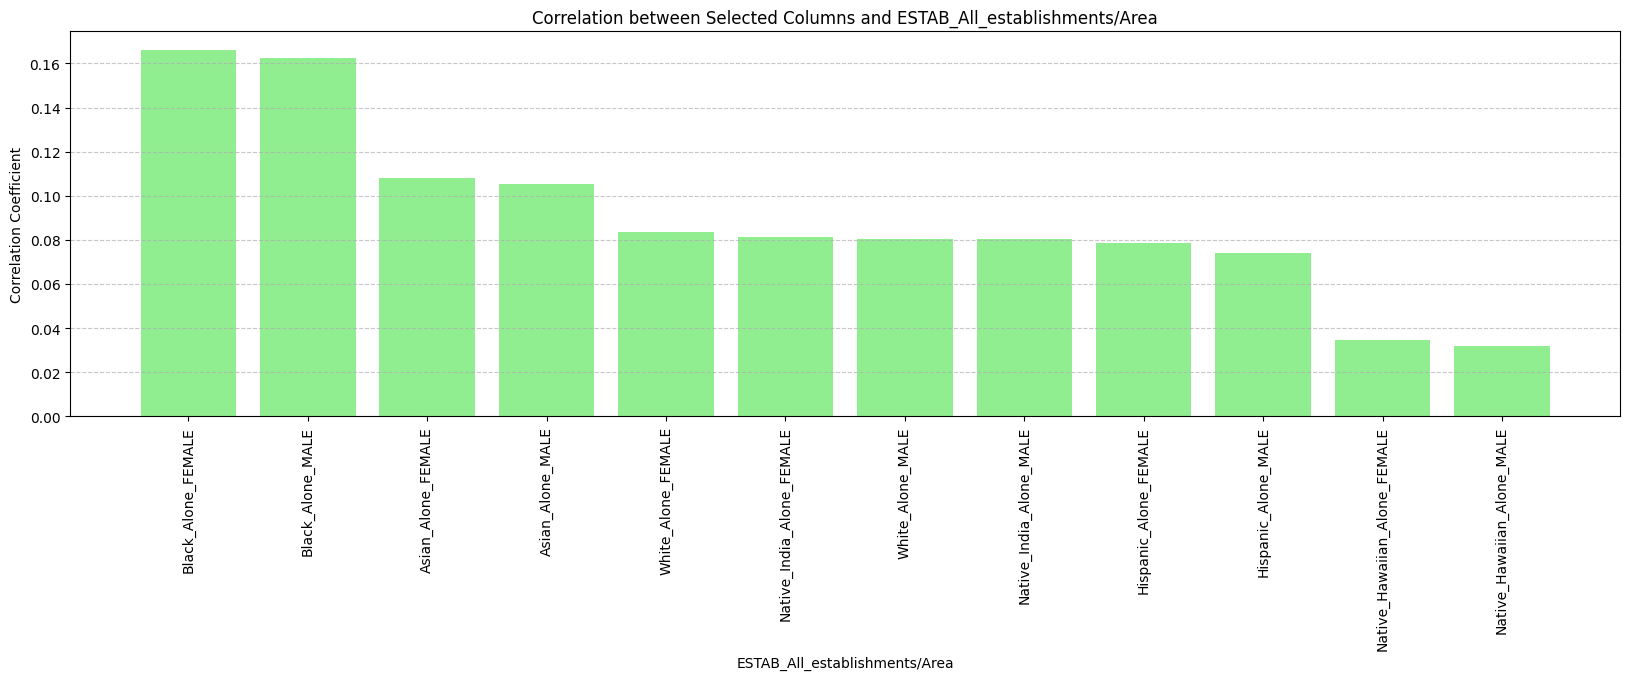

In [48]:
corr_columns = population_data.columns [8:-12]

correlation_results = []

for column in corr_columns:
    correlation = final_merged_data[relationship_column].corr(final_merged_data[column])
    correlation_results.append({'Column': column, 'Correlation': correlation})


df_correlations = pd.DataFrame(correlation_results)
df_correlations = df_correlations.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(20, 5))
plt.bar(df_correlations['Column'], df_correlations['Correlation'], color='lightgreen')
plt.xlabel(relationship_column)
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation between Selected Columns and {relationship_column}')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

### Pick an age group

In [49]:
age = 'Total'

specific_age_data = final_merged_data[final_merged_data['AGERANGE_LOWER'] == age]
specific_age_data = specific_age_data[['STATE', 'COUNTY','YEAR','TOT_POP', relationship_column]]
specific_age_data

,STATE,COUNTY,YEAR,TOT_POP,ESTAB_All_establishments/Area
0,1,1,2019,58809,0.004547
19,1,1,2020,58915,0.003897
38,1,1,2021,59203,0.006495
57,1,1,2022,59726,0.005846
76,1,3,2019,231768,0.007771
...,...,...,...,...,...
238013,56,43,2022,7724,0.000000
238032,56,45,2019,6838,0.000644
238051,56,45,2020,6816,0.000644
238070,56,45,2021,6746,0.000805


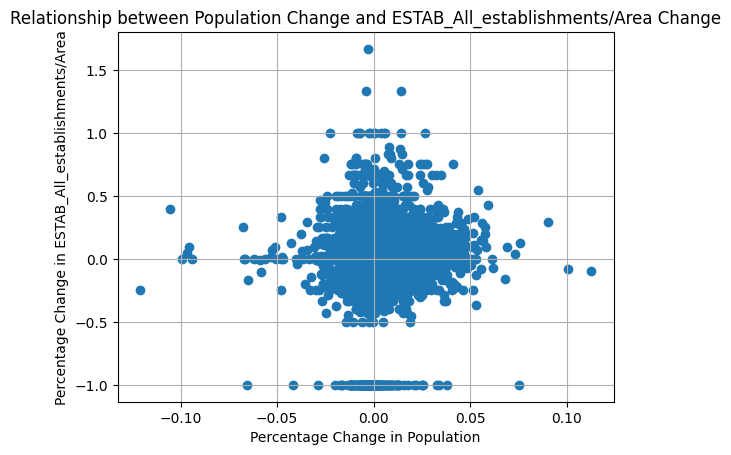

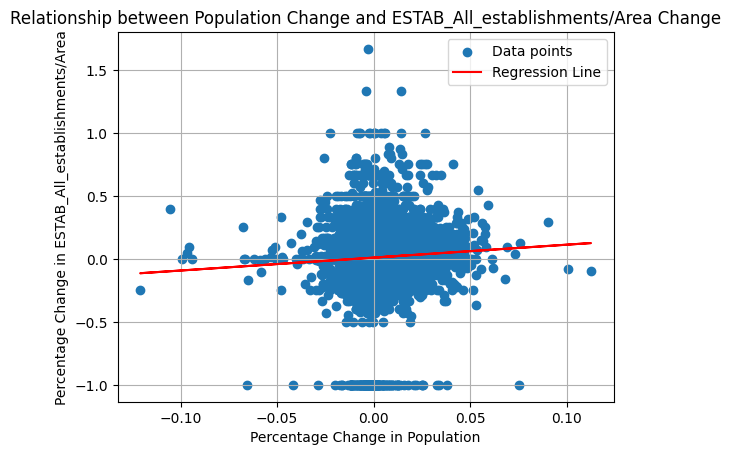

Regression line: y = 1.0249 * x + 0.0104


In [50]:
from sklearn.linear_model import LinearRegression

df_sorted = specific_age_data.sort_values(by=['STATE', 'COUNTY', 'YEAR'])
df_sorted['POP_CHANGE'] = df_sorted.groupby(['STATE', 'COUNTY'])['TOT_POP'].pct_change()
df_sorted['relationship_column_CHANGE'] = df_sorted.groupby(['STATE', 'COUNTY'])[relationship_column].pct_change()

df_changes = df_sorted.dropna(subset=['POP_CHANGE', 'relationship_column_CHANGE'])
df_changes = df_changes.replace([np.inf, -np.inf], np.nan).dropna(subset=['POP_CHANGE', 'relationship_column_CHANGE'])

plt.scatter(df_changes['POP_CHANGE'], df_changes['relationship_column_CHANGE'])
plt.xlabel('Percentage Change in Population')
plt.ylabel(f'Percentage Change in {relationship_column}')
plt.title(f'Relationship between Population Change and {relationship_column} Change')
plt.grid(True)
plt.show()

X = df_changes['POP_CHANGE'].values.reshape(-1, 1)
y = df_changes['relationship_column_CHANGE'].values.reshape(-1, 1)

reg_model = LinearRegression().fit(X, y)
slope = reg_model.coef_[0][0]
intercept = reg_model.intercept_[0]

plt.scatter(df_changes['POP_CHANGE'], df_changes['relationship_column_CHANGE'], label='Data points')
plt.plot(df_changes['POP_CHANGE'], reg_model.predict(X), color='red', label='Regression Line')
plt.xlabel('Percentage Change in Population')
plt.ylabel(f'Percentage Change in {relationship_column}')
plt.title(f'Relationship between Population Change and {relationship_column} Change')
plt.legend()
plt.grid(True)
plt.show()

print(f'Regression line: y = {slope:.4f} * x + {intercept:.4f}')

The scatter plot and regression analysis suggest a weak positive relationship between percentage changes in population (POP_CHANGE) and the number of establishments (ESTAB_CHANGE). The shallow slope of the regression line indicates that, on average, increases in population are associated with slight increases in the number of establishments, but the effect is small. The wide scatter of data points around the regression line implies considerable variability, indicating that population change alone is not a strong predictor of changes in the number of establishments and that other factors likely influence this relationship

In [51]:
all_age_data = final_merged_data [final_merged_data['AGERANGE_LOWER'] != "Total"] [['AGERANGE_LOWER', 'AGERANGE_UPPER', 'STATE', 'COUNTY','YEAR','TOT_POP', relationship_column]]
all_age_data

,AGERANGE_LOWER,AGERANGE_UPPER,STATE,COUNTY,YEAR,TOT_POP,ESTAB_All_establishments/Area
1,0,4,1,1,2019,3491,0.004547
2,5,9,1,1,2019,3663,0.004547
3,10,14,1,1,2019,4190,0.004547
4,15,19,1,1,2019,3881,0.004547
5,20,24,1,1,2019,3240,0.004547
...,...,...,...,...,...,...,...
238103,65,69,56,45,2022,582,0.000644
238104,70,74,56,45,2022,406,0.000644
238105,75,79,56,45,2022,249,0.000644
238106,80,84,56,45,2022,137,0.000644


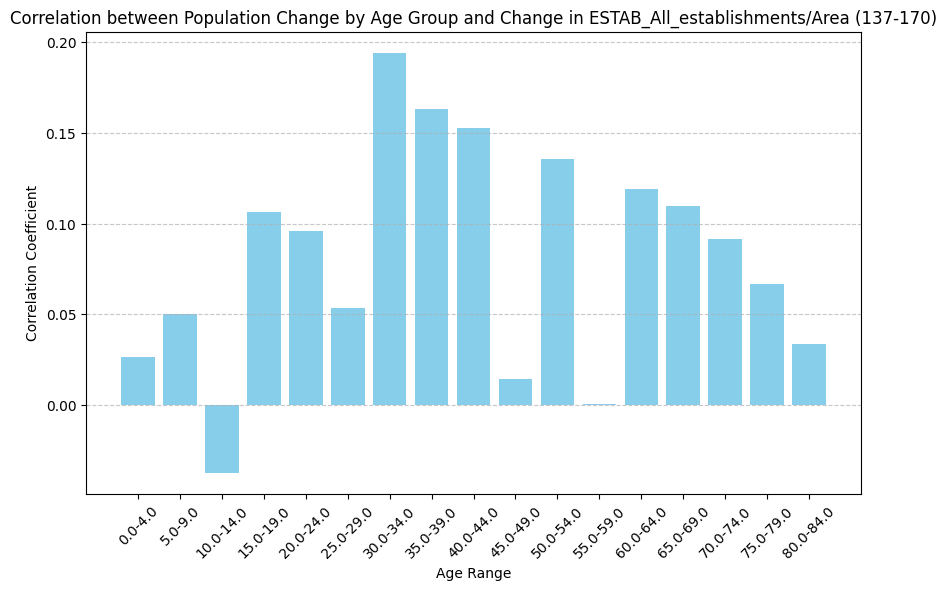

In [52]:
change_data = []

for (state, county, age_lower, age_upper), group in all_age_data.groupby(['STATE', 'COUNTY', 'AGERANGE_LOWER', 'AGERANGE_UPPER']):


    pop_year_1 = group.loc[group['YEAR'] == 2019, 'TOT_POP'].values
    pop_year_2 = group.loc[group['YEAR'] == 2022, 'TOT_POP'].values
    relationship_column_2018 = group.loc[group['YEAR'] == 2019, relationship_column].values
    relationship_column_2021 = group.loc[group['YEAR'] == 2022, relationship_column].values

    if len(pop_year_1) == 0 or len(pop_year_2) == 0 or len(relationship_column_2018) == 0 or len(relationship_column_2021) == 0:
        continue 

    # Extract the values
    pop_year_1 = pop_year_1[0]
    pop_year_2 = pop_year_2[0]
    relationship_column_2018 = relationship_column_2018[0]
    relationship_column_2021 = relationship_column_2021[0]

    # Compute changes
    pop_change = pop_year_2 - pop_year_1
    relationship_column_change = relationship_column_2021 - relationship_column_2018

    change_data.append({
        'STATE': state,
        'COUNTY': county,
        'AGERANGE_LOWER': age_lower,
        'AGERANGE_UPPER': age_upper,
        'POP_CHANGE': pop_change,
        'relationship_column_CHANGE': relationship_column_change
    })

df_changes = pd.DataFrame(change_data)

correlations = []

for idx, row in df_changes[['AGERANGE_LOWER', 'AGERANGE_UPPER']].drop_duplicates().iterrows():
    age_lower = row['AGERANGE_LOWER']
    age_upper = row['AGERANGE_UPPER']
    
    df_age_group = df_changes[(df_changes['AGERANGE_LOWER'] == age_lower) & (df_changes['AGERANGE_UPPER'] == age_upper)]
    
    if len(df_age_group) > 1:
        correlation = df_age_group['POP_CHANGE'].corr(df_age_group['relationship_column_CHANGE'])
        correlations.append({
            'Age Range': f'{age_lower}-{age_upper}',
            'Correlation': correlation
        })

df_correlations = pd.DataFrame(correlations)

plt.figure(figsize=(10, 6))
plt.bar(df_correlations['Age Range'], df_correlations['Correlation'], color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation between Population Change by Age Group and Change in {relationship_column} ({pop_year_2}-{pop_year_1})')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



The bar chart illustrates the correlation coefficients between population change by age group and the change in establishments per area from 2019 to 2022. Correlation values range from close to 0 (weak or no correlation) to around 0.2 (moderate positive correlation). The age group 30-34 shows the highest correlation (~0.2), suggesting a stronger relationship between population changes and establishment density changes for this group. Other groups like 35-39 and 60-64 also exhibit moderate correlations, while groups such as 10-14 and 40-44 show weaker or negligible correlations. This indicates varying degrees of impact based on the population's age range.

### Men vs Women

In [53]:
men_vs_women = final_merged_data [final_merged_data['AGERANGE_LOWER'] == "Total"].copy()

men_vs_women['MALE_PERCENT'] = men_vs_women['TOT_MALE'] / men_vs_women['TOT_POP']
men_vs_women['FEMALE_PERCENT'] = men_vs_women['TOT_FEMALE'] / men_vs_women['TOT_POP']

men_vs_women = men_vs_women [['STATE', 'COUNTY', 'YEAR', relationship_column, 'MALE_PERCENT', 'FEMALE_PERCENT']]
men_vs_women

,STATE,COUNTY,YEAR,ESTAB_All_establishments/Area,MALE_PERCENT,FEMALE_PERCENT
0,1,1,2019,0.004547,0.487987,0.512013
19,1,1,2020,0.003897,0.488161,0.511839
38,1,1,2021,0.006495,0.486158,0.513842
57,1,1,2022,0.005846,0.486053,0.513947
76,1,3,2019,0.007771,0.488648,0.511352
...,...,...,...,...,...,...
238013,56,43,2022,0.000000,0.516960,0.483040
238032,56,45,2019,0.000644,0.542995,0.457005
238051,56,45,2020,0.000644,0.544601,0.455399
238070,56,45,2021,0.000805,0.548473,0.451527


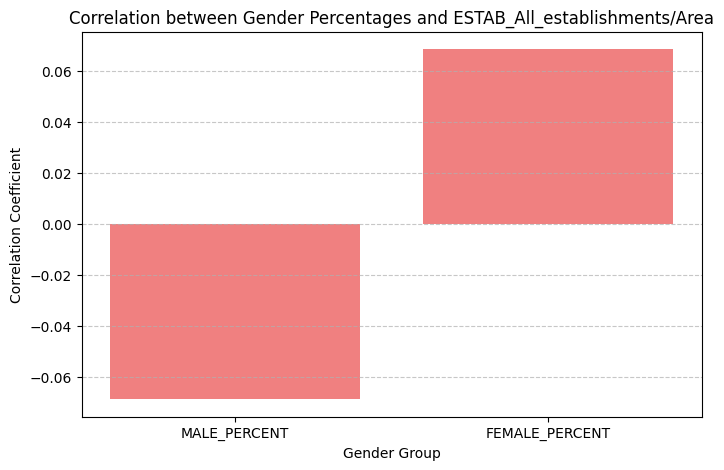

In [54]:
columns_to_correlate = ['MALE_PERCENT', 'FEMALE_PERCENT']

correlation_results = []

for column in columns_to_correlate:
    correlation = men_vs_women[relationship_column].corr(men_vs_women[column])
    correlation_results.append({'Gender Group': column, 'Correlation': correlation})

df_correlations = pd.DataFrame(correlation_results)

plt.figure(figsize=(8, 5))
plt.bar(df_correlations['Gender Group'], df_correlations['Correlation'], color='lightcoral')
plt.xlabel('Gender Group')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation between Gender Percentages and {relationship_column}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The percentage of females (FEMALE_PERCENT) has a positive correlation of around 0.07 with the number of establishments, suggesting that counties with a higher percentage of females tend to have slightly more establishments. In contrast, the percentage of males (MALE_PERCENT) shows a negative correlation of around -0.07, indicating that an increase in the percentage of males may be associated with a decrease in the number of establishments. However, both correlations are relatively weak, implying that gender composition does not have a strong influence on the number of establishments.

### Race (without age)

In [55]:
percentage_columns = []
for col in male_alone_columns + female_alone_columns:
    population_data[f"{col}_PERCENT"] = (population_data[col] / population_data['TOT_POP']) * 100
    percentage_columns.append(f"{col}_PERCENT")

In [56]:
final_merged_data

,STATE,COUNTY,AGERANGE_LOWER,AGERANGE_UPPER,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,White_Alone_MALE,White_Alone_FEMALE,...,ESTAB_Establishments_with_100_to_249_employees/Area,ESTAB_Establishments_with_10_to_19_employees/Area,ESTAB_Establishments_with_20_to_49_employees/Area,ESTAB_Establishments_with_250_to_499_employees/Area,ESTAB_Establishments_with_500_to_999_employees/Area,ESTAB_Establishments_with_50_to_99_employees/Area,ESTAB_Establishments_with_5_to_9_employees/Area,ESTAB_Establishments_with_less_than_5_employees/Area,"ESTAB_Establishments_with_1,000_employees_or_more/Area","ESTAB_Establishments_with_1,000_to_1,499_employees/Area"
0,1,1,Total,Total,2019,58809,28698,30111,21979,22636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
1,1,1,0,4,2019,3491,1818,1673,1299,1171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
2,1,1,5,9,2019,3663,1875,1788,1347,1271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
3,1,1,10,14,2019,4190,2153,2037,1540,1459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
4,1,1,15,19,2019,3881,1962,1919,1415,1409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238103,56,45,65,69,2022,582,316,266,288,238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238104,56,45,70,74,2022,406,224,182,217,175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238105,56,45,75,79,2022,249,127,122,122,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238106,56,45,80,84,2022,137,64,73,61,72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [57]:
race_without_age_data = final_merged_data [final_merged_data['AGERANGE_LOWER'] == "Total"].copy()

race_without_age_data['White_Alone_PERCENT'] = race_without_age_data['White_Alone_MALE_PERCENT'] + race_without_age_data['White_Alone_FEMALE_PERCENT']
race_without_age_data['Black_Alone_PERCENT'] = race_without_age_data['Black_Alone_MALE_PERCENT'] + race_without_age_data['Black_Alone_FEMALE_PERCENT']
race_without_age_data['Native_India_Alone_PERCENT'] = race_without_age_data['Native_India_Alone_MALE_PERCENT'] + race_without_age_data['Native_India_Alone_FEMALE_PERCENT']
race_without_age_data['Asian_Alone_PERCENT'] = race_without_age_data['Asian_Alone_MALE_PERCENT'] + race_without_age_data['Asian_Alone_FEMALE_PERCENT']
race_without_age_data['Native_Hawaiian_Alone_PERCENT'] = race_without_age_data['Native_Hawaiian_Alone_MALE_PERCENT'] + race_without_age_data['Native_Hawaiian_Alone_FEMALE_PERCENT']
race_without_age_data['Hispanic_Alone_PERCENT'] = race_without_age_data['Hispanic_Alone_MALE_PERCENT'] + race_without_age_data['Hispanic_Alone_FEMALE_PERCENT']

race_without_age_data [['STATE', 'COUNTY','YEAR', relationship_column, 'White_Alone_PERCENT', 'Black_Alone_PERCENT',
    'Native_India_Alone_PERCENT', 'Asian_Alone_PERCENT',
    'Native_Hawaiian_Alone_PERCENT', 'Hispanic_Alone_PERCENT']]

,STATE,COUNTY,YEAR,ESTAB_All_establishments/Area,White_Alone_PERCENT,Black_Alone_PERCENT,Native_India_Alone_PERCENT,Asian_Alone_PERCENT,Native_Hawaiian_Alone_PERCENT,Hispanic_Alone_PERCENT
0,1,1,2019,0.004547,75.864238,20.488361,0.484620,1.173290,0.113928,3.592987
19,1,1,2020,0.003897,75.720954,20.587287,0.478656,1.176271,0.117118,3.627260
38,1,1,2021,0.006495,75.176934,21.004003,0.462814,1.200953,0.123305,3.771768
57,1,1,2022,0.005846,74.799920,21.319024,0.477179,1.168670,0.127248,3.787295
76,1,3,2019,0.007771,87.322667,8.754013,0.794760,1.093766,0.069466,5.458476
...,...,...,...,...,...,...,...,...,...,...
238013,56,43,2022,0.000000,94.471776,0.517866,1.696012,0.867426,0.090627,13.982393
238032,56,45,2019,0.000644,93.170518,0.789705,2.179000,1.389295,0.029248,4.518865
238051,56,45,2020,0.000644,93.060446,0.836268,2.200704,1.408451,0.029343,4.680164
238070,56,45,2021,0.000805,92.958790,0.859769,2.208716,1.482360,0.029647,5.128965


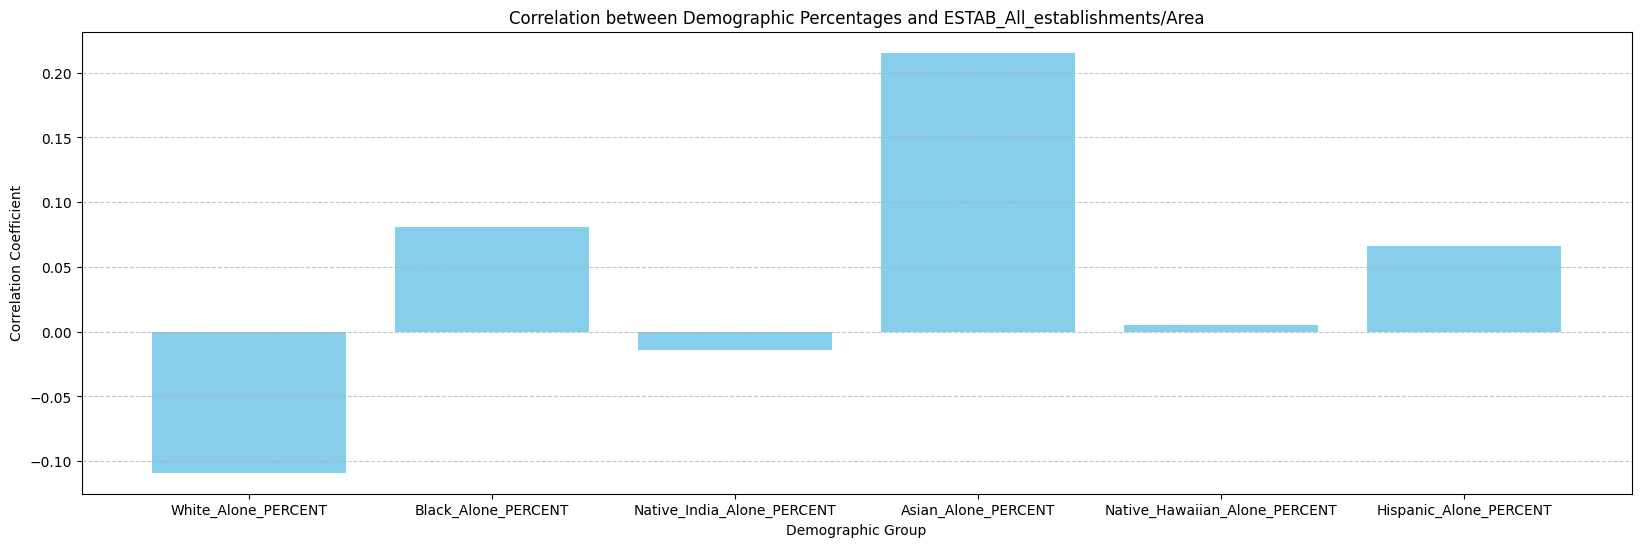

In [58]:
columns_to_correlate = [
    'White_Alone_PERCENT',
    'Black_Alone_PERCENT',
    'Native_India_Alone_PERCENT',
    'Asian_Alone_PERCENT',
    'Native_Hawaiian_Alone_PERCENT',
    'Hispanic_Alone_PERCENT'
]

correlation_results = []

for column in columns_to_correlate:
    correlation = race_without_age_data[relationship_column].corr(race_without_age_data[column])
    correlation_results.append({'Demographic Group': column, 'Correlation': correlation})

df_correlations = pd.DataFrame(correlation_results)

plt.figure(figsize=(20, 6))
plt.bar(df_correlations['Demographic Group'], df_correlations['Correlation'], color='skyblue')
plt.xlabel('Demographic Group')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation between Demographic Percentages and {relationship_column}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart shows the correlation between the percentage of each demographic group and the number of establishments. The percentage of Asian Alone population has the highest positive correlation (~0.4) with the number of establishments, suggesting that counties with a higher percentage of the Asian population tend to have more establishments. The Hispanic Alone and Black Alone groups also show a positive correlation, though weaker, indicating some association between their population share and establishment numbers. Conversely, the White Alone and Native India Alone groups have negative correlations, with White Alone around -0.1, suggesting that a higher percentage of these populations might be associated with fewer establishments. The Native Hawaiian Alone percentage has a near-zero correlation, implying little to no relationship with the number of establishments. These results indicate that the presence of different demographic groups can have varying effects on local economic activity, as reflected by the number of establishments.

## Tests

### T-Test: At-Risk vs. Safe Counties

In [59]:
final_merged_data

,STATE,COUNTY,AGERANGE_LOWER,AGERANGE_UPPER,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,White_Alone_MALE,White_Alone_FEMALE,...,ESTAB_Establishments_with_100_to_249_employees/Area,ESTAB_Establishments_with_10_to_19_employees/Area,ESTAB_Establishments_with_20_to_49_employees/Area,ESTAB_Establishments_with_250_to_499_employees/Area,ESTAB_Establishments_with_500_to_999_employees/Area,ESTAB_Establishments_with_50_to_99_employees/Area,ESTAB_Establishments_with_5_to_9_employees/Area,ESTAB_Establishments_with_less_than_5_employees/Area,"ESTAB_Establishments_with_1,000_employees_or_more/Area","ESTAB_Establishments_with_1,000_to_1,499_employees/Area"
0,1,1,Total,Total,2019,58809,28698,30111,21979,22636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
1,1,1,0,4,2019,3491,1818,1673,1299,1171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
2,1,1,5,9,2019,3663,1875,1788,1347,1271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
3,1,1,10,14,2019,4190,2153,2037,1540,1459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
4,1,1,15,19,2019,3881,1962,1919,1415,1409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001949,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238103,56,45,65,69,2022,582,316,266,288,238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238104,56,45,70,74,2022,406,224,182,217,175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238105,56,45,75,79,2022,249,127,122,122,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
238106,56,45,80,84,2022,137,64,73,61,72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [60]:
threshold = 0.001  
final_merged_data['At_Risk'] = (
    final_merged_data['ESTAB_All_establishments/Area'] < threshold
)

In [61]:
from scipy.stats import ttest_ind

at_risk = final_merged_data[final_merged_data['At_Risk'] == True]
safe = final_merged_data[final_merged_data['At_Risk'] == False]

# Perform T-Test
t_stat, p_value = ttest_ind(at_risk['PAYANN/Area'], safe['PAYANN/Area'], equal_var=False)

print("T-Test Results")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Test Results
T-Statistic: -60.55498626378366
P-Value: 0.0


The T-test results indicate a highly significant difference between at-risk and safe counties in terms of PAYANN/Area (average annual pay per area). With a T-statistic of -60.56 and a P-value of 0.0 (less than any conventional significance level, e.g., 0.05), we can confidently conclude that the mean annual pay per area is significantly lower in at-risk counties compared to safe counties. This suggests that lower income levels may be a key factor contributing to the risk of becoming grocery store deserts.

### Anova

In [62]:
from scipy.stats import f_oneway

for column in ['ESTAB_All_establishments/Area', 'EMP/Area', 'PAYANN/Area']:

    county_groups = [
        filtered_data[filtered_data['COUNTY'] == county][column]
        for county in filtered_data['COUNTY'].unique()
    ]

    anova_stat, anova_p = f_oneway(*county_groups)

    print(f"ANOVA Test {column}")
    print(f"F-Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    print()

ANOVA Test ESTAB_All_establishments/Area
F-Statistic: 1.7262936898785737
P-Value: 2.9129955274299375e-14

ANOVA Test EMP/Area
F-Statistic: 4.148526893499749
P-Value: 3.1445160184853525e-115

ANOVA Test PAYANN/Area
F-Statistic: 4.4969137417159075
P-Value: 4.0157580056853896e-132



ANOVA Test for ESTAB_All_establishments/Area: The F-Statistic of 1.726 and extremely small P-Value (2.91e-14) indicate statistically significant differences in the density of establishments per area across groups (e.g., counties or states). While the differences are significant, the relatively low F-Statistic suggests the variation between group means is less pronounced compared to within-group variation.

ANOVA Test for EMP/Area: With an F-Statistic of 4.149 and a P-Value essentially zero (3.14e-115), the results show significant differences in employee density per area across the groups. The higher F-Statistic suggests that the variation in employee distribution among the groups is stronger compared to establishment density, pointing to meaningful regional or group-level disparities.

ANOVA Test for PAYANN/Area: The F-Statistic of 4.497 and P-Value (4.02e-132) indicate highly significant differences in annual payroll per area among groups. This test suggests the most pronounced variation of the three metrics analyzed, highlighting notable disparities in payroll distribution across the groups, likely reflecting differing economic conditions or workforce compositions.